In [21]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def f(W,x,layers):
    a=x
    for l in range(layers-1):
        w = W[l];
        #print(w.shape)
        a = sigmoid(np.matmul(np.transpose(w),a))
    #print('a value before last layer:',a)
    a = sigmoid(W[layers-1,0,0]*a[0]+W[layers-1,1,0]*a[1])
    #print('a value after last layer:',a)
    return a;

def error_func(y,y_hat):
    return y*np.log(y_hat)+(1-y)*np.log(1-y_hat)

def CEO(nj_list,tau,mean,sigma,layers,X,Y,rho):
    complete_weights = np.ones((tau,1,layers,2,2))
    error_vals=[];
    acc_vals=[]
    for i in tqdm(range(tau)):
        W = np.ones((nj_list[i],layers,2,2))*0.5
        W[:,-1,:,-1] = 0
        objective_function_list = np.zeros(nj_list[i])
        acc_list = np.zeros(nj_list[i])
        for j in range(nj_list[i]):
            for l in range(layers):
                w11,w12 = np.random.normal(mean[l][0],sigma[l][0],2)
                w21,w22 = np.random.normal(mean[l][1],sigma[l][0],2)
                W[j][l][0] = np.array([w11,w12])
                W[j][l][1] = np.array([w21,w22])
            W[:,-1,:,-1] = 0
            error = 0
            #print(X,Y)
            for x,y in zip(X,Y):
                a = f(W[j],x,layers)
                acc = y*a+(1-y)*(1-a)
                error = error + np.abs(error_func(y,a))
            objective_function_list[j] = error
            acc_list[j] = acc
        #print('Objective function list:',objective_function_list)
        #complete_weights[i] = W
        considered_indices = np.argsort(objective_function_list)
        mean_error = np.mean(objective_function_list[considered_indices[:int(rho*nj_list[i])]])
        mean_acc = np.mean(acc_list[considered_indices[:int(rho*nj_list[i])]])
        error_vals.append(mean_error)
        acc_vals.append(mean_acc)
        for l in range(layers-1):
            mean[l] = np.mean(np.mean(W[considered_indices[:int(rho*nj_list[i])],l],0),1)#np.mean(W[considered_indices[:int(rho*nj_list[i])],l,0])
        # print(mean.shape)
        mean[-1][0] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[0][0]
        mean[-1][1] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[1][0]
        
    return mean,error_vals,acc_vals
X = np.array([[1,1],[1,2]])
y = np.array([[1],[0]])
list_of_tau = np.arange(100,50*100,100)
mean,error_vals,acc_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)
print('Final accuracy:',acc_vals[-1])

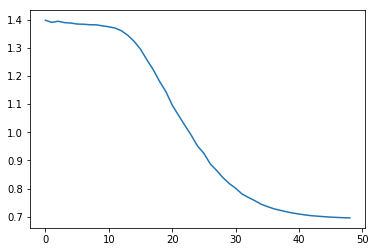

In [25]:
#print(error_vals)
from matplotlib import pyplot as plt
plt.plot(error_vals)

# Iris

In [ ]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

# list_of_tau = [160,180,100,120,1200,80,60,130,180,200,120,140,60,140]
list_of_tau = [random.randint(50,200) for i in range(100)]

mean,error_vals,acc_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X[:99],y[:99],0.1)

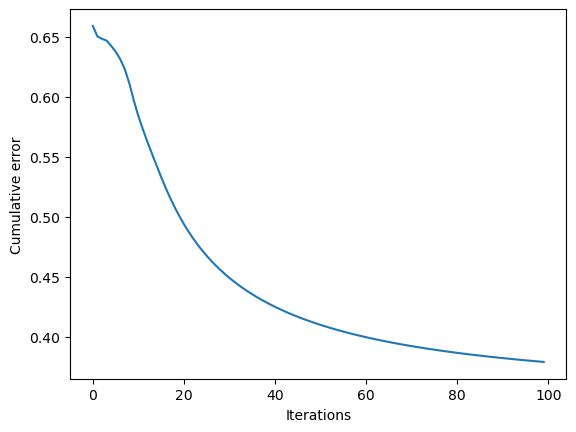

In [38]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot((np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))/100)
plt.savefig('IRIS.pdf', format='pdf')

# Pulsar

In [ ]:
df = pd.read_excel('D://datasets//Pulsar//Pulsar_reduced.xlsx')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.array([[i] for i in y])

# list_of_tau = [2000,1800,1600,1400,1200,1000,800,600,400,200]
list_of_tau = np.arange(10,50*10,10)

mean,error_vals,acc_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.1)


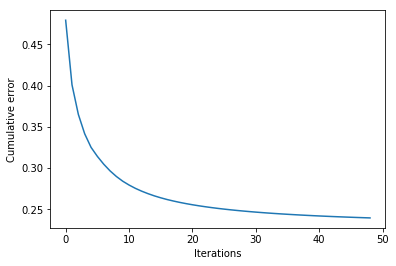

In [30]:
plt.xlabel("Iterations")
plt.ylabel("Cumulative error")
plt.plot((np.cumsum(error_vals)/np.arange(1,len(list_of_tau)+1))/X.shape[0])
plt.savefig('PULSAR.pdf', format='pdf')

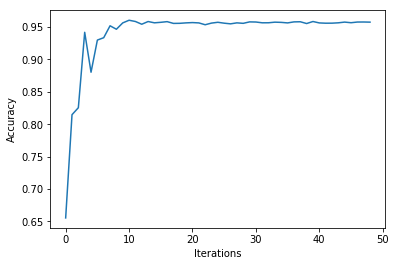

In [35]:
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(acc_vals)
plt.savefig('PULSAR_accuracy.pdf', format='pdf')

In [34]:
print("Final accuracy:",acc_vals[-1])

Final accuracy: 0.9576114368856371
